<h1>Sales EDA

Combining the sales data from the different sources and performing EDA on the combined data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Code to Join the sheets to one dataframe

In [49]:
# Python
import pandas as pd
import os

# Directory where the Excel files are located
directory = 'datasets/Sales'

# List to store the dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx") or filename.endswith(".xls"):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Read the Excel file
        df = pd.read_excel(file_path)
        
        # Select the required columns
        df = df[['DATE', 'PRODUCT CODE', 'DESCRIPTION', 'QTY']]
        
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes
final_df = pd.concat(dfs, ignore_index=True)

In [50]:
final_df

,DATE,PRODUCT CODE,DESCRIPTION,QTY
0,01/01/2022,10444,HARISCHANDRA COFFEE 100G,2.0
1,02/01/2022,10444,HARISCHANDRA COFFEE 100G,1.0
2,01/01/2022,10444,HARISCHANDRA COFFEE 100G,1.0
3,02/01/2022,10444,HARISCHANDRA COFFEE 100G,2.0
4,02/01/2022,10444,HARISCHANDRA COFFEE 100G,6.0
...,...,...,...,...
34627,21/10/2023,34686,CARGILLS VANILLA ICE CREAM 2L,1.0
34628,25/10/2023,34686,CARGILLS VANILLA ICE CREAM 2L,1.0
34629,29/10/2023,34686,CARGILLS VANILLA ICE CREAM 2L,1.0
34630,02/11/2023,34686,CARGILLS VANILLA ICE CREAM 2L,2.0


<h1><strong>EDA on the Sales Dataset<strong><h1>

<h2>1. Using .describe()</h2>

In [40]:
print(final_df.describe())# get a quick summary on the dataset from the quanitity values

       PRODUCT CODE           QTY
count  34632.000000  34632.000000
mean   14353.275930     11.285710
std     7934.239623     40.150993
min    10198.000000  -2160.000000
25%    10415.000000      1.000000
50%    10444.000000      3.000000
75%    12978.000000      8.000000
max    57096.000000   2875.000000


A total of 34632 products were sold. <br>
Product code 12974 has been the most frequently purchased products while 25% of the products purchased are of code 10415. Lets look into more detail

<h2>2. Check for missing values</h2>

In [39]:
missingValues = final_df.isna().sum().sum()
print(f'Total number of missing values: {missingValues}')

zero_quantity = final_df['QTY'] == 0
empty_description = final_df['DESCRIPTION'].isna()

total = (zero_quantity & empty_description).sum()
print(f'Total number of rows with zero quantity and empty description: {total}')

Total number of missing values: 0
Total number of rows with zero quantity and empty description: 0


There are no rows with missing values in the dataset. However, there are some negative values in the QTY column.

<h2>3. Convert the columns to correct date types</h2>

In [54]:
import pandas as pd

df= final_df.copy()
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')  # Specify the correct date format

df['Day'] = df['DATE'].dt.day
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year
df['DayOfWeek'] = df['DATE'].dt.day_name()

df

,DATE,PRODUCT CODE,DESCRIPTION,QTY,Day,Month,Year,DayOfWeek
0,2022-01-01,10444,HARISCHANDRA COFFEE 100G,2.0,1,1,2022,Saturday
1,2022-01-02,10444,HARISCHANDRA COFFEE 100G,1.0,2,1,2022,Sunday
2,2022-01-01,10444,HARISCHANDRA COFFEE 100G,1.0,1,1,2022,Saturday
3,2022-01-02,10444,HARISCHANDRA COFFEE 100G,2.0,2,1,2022,Sunday
4,2022-01-02,10444,HARISCHANDRA COFFEE 100G,6.0,2,1,2022,Sunday
...,...,...,...,...,...,...,...,...
34627,2023-10-21,34686,CARGILLS VANILLA ICE CREAM 2L,1.0,21,10,2023,Saturday
34628,2023-10-25,34686,CARGILLS VANILLA ICE CREAM 2L,1.0,25,10,2023,Wednesday
34629,2023-10-29,34686,CARGILLS VANILLA ICE CREAM 2L,1.0,29,10,2023,Sunday
34630,2023-11-02,34686,CARGILLS VANILLA ICE CREAM 2L,2.0,2,11,2023,Thursday


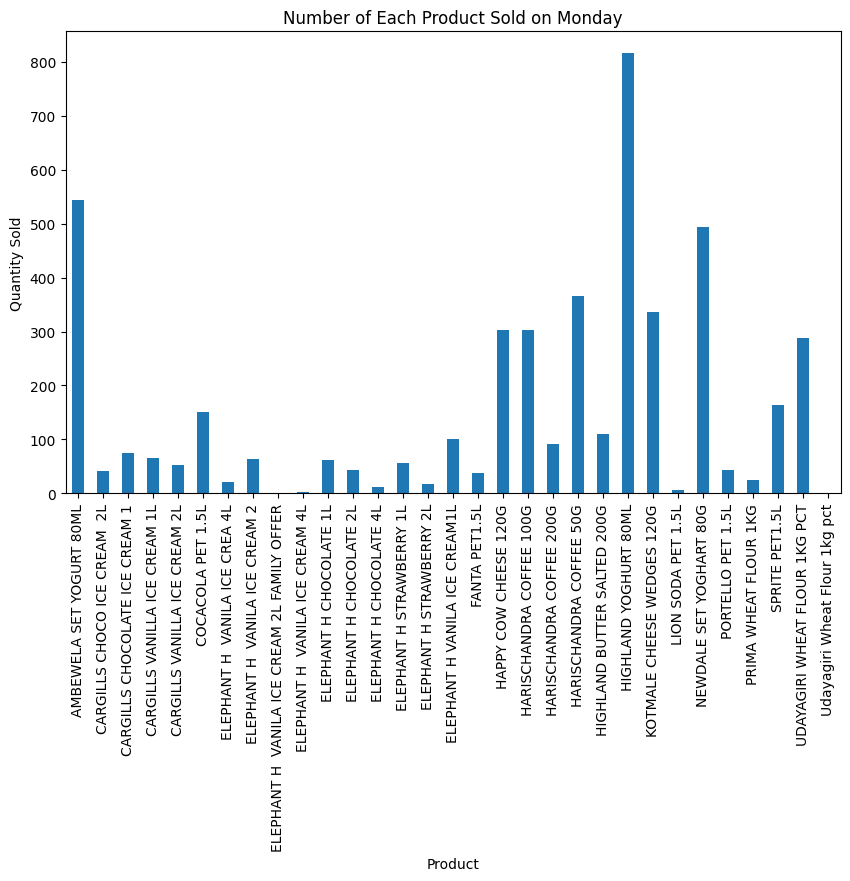

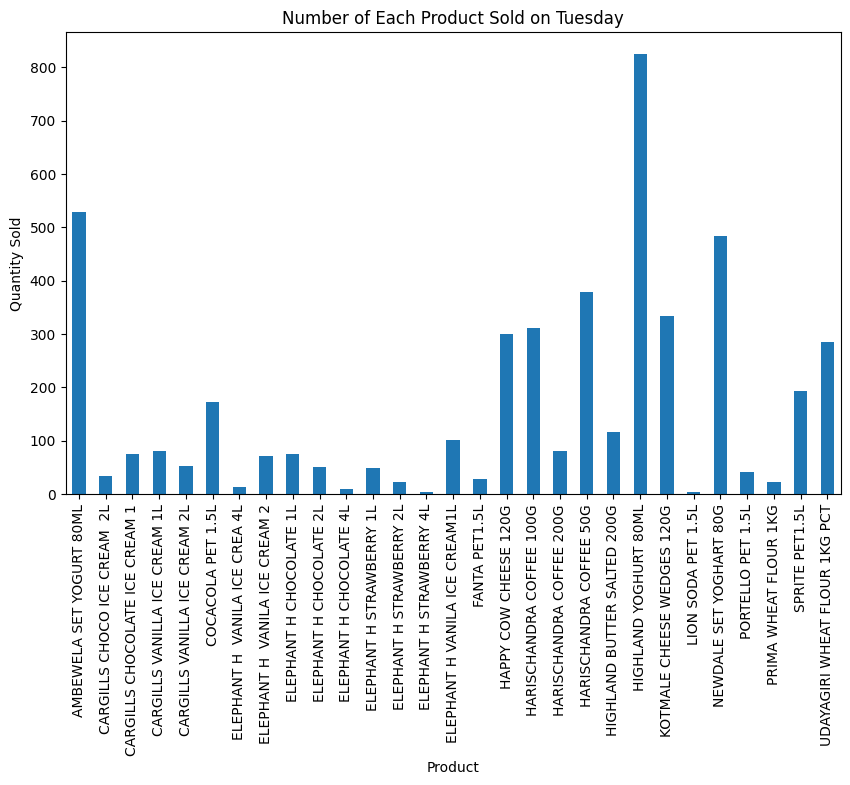

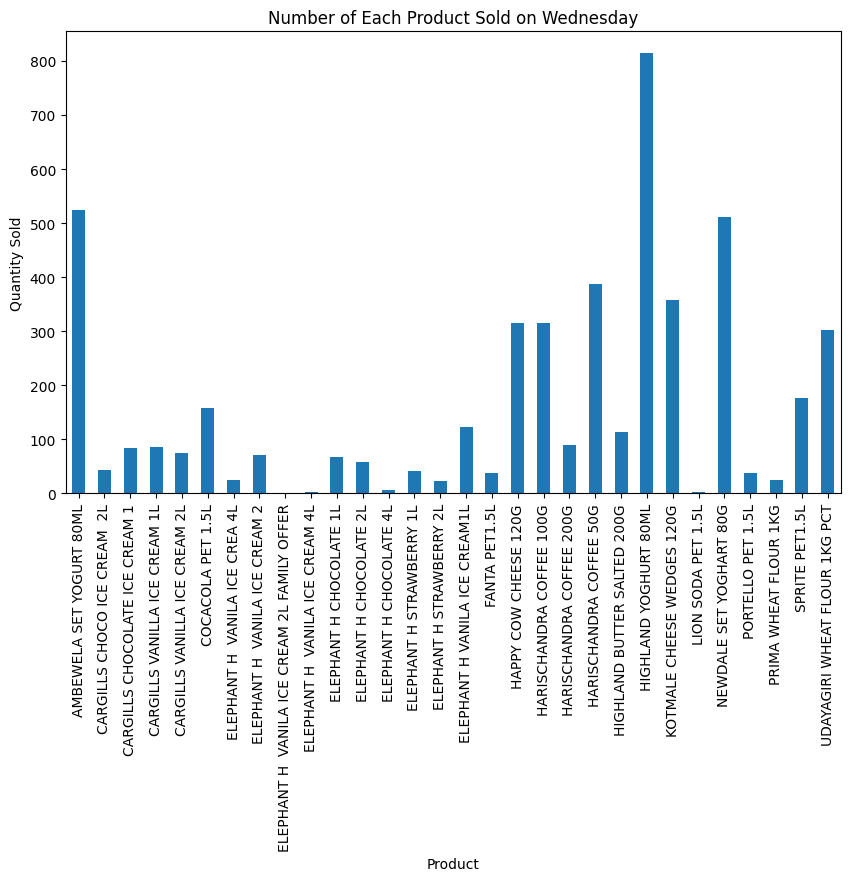

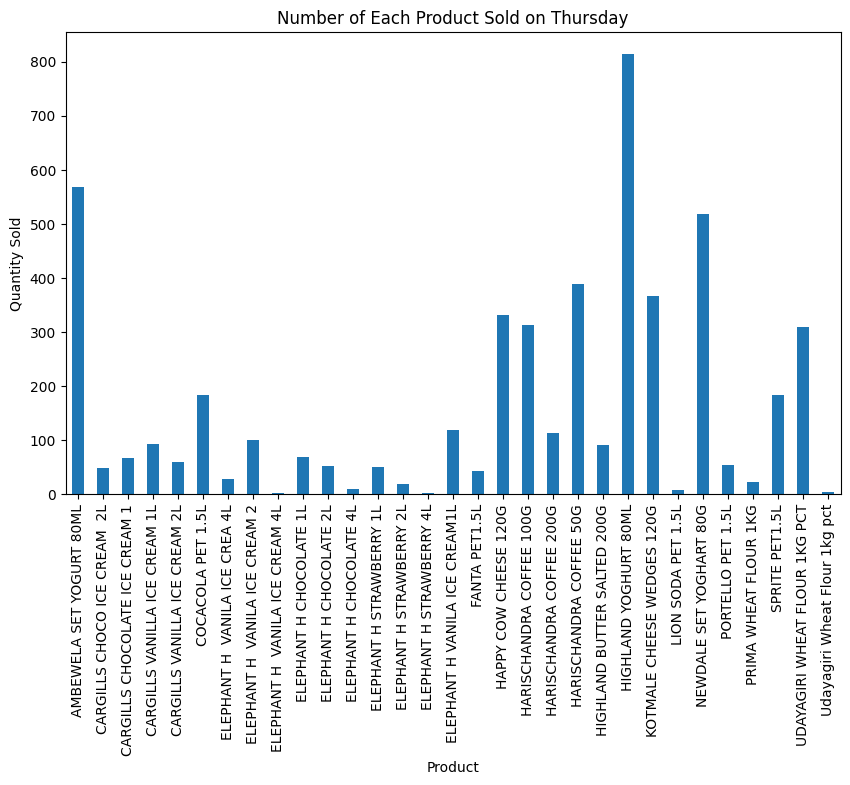

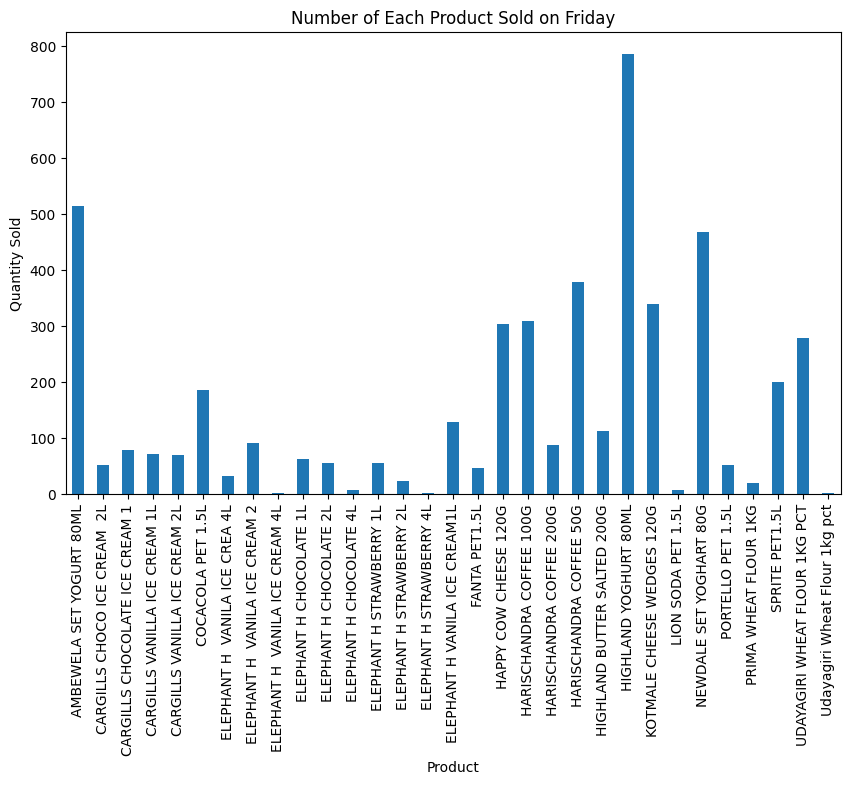

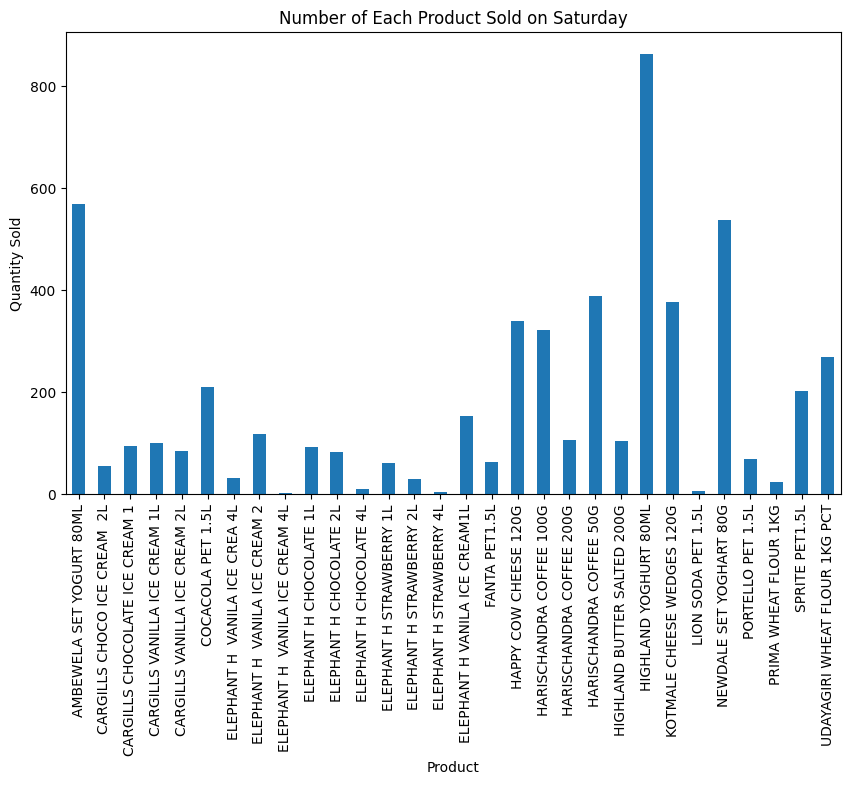

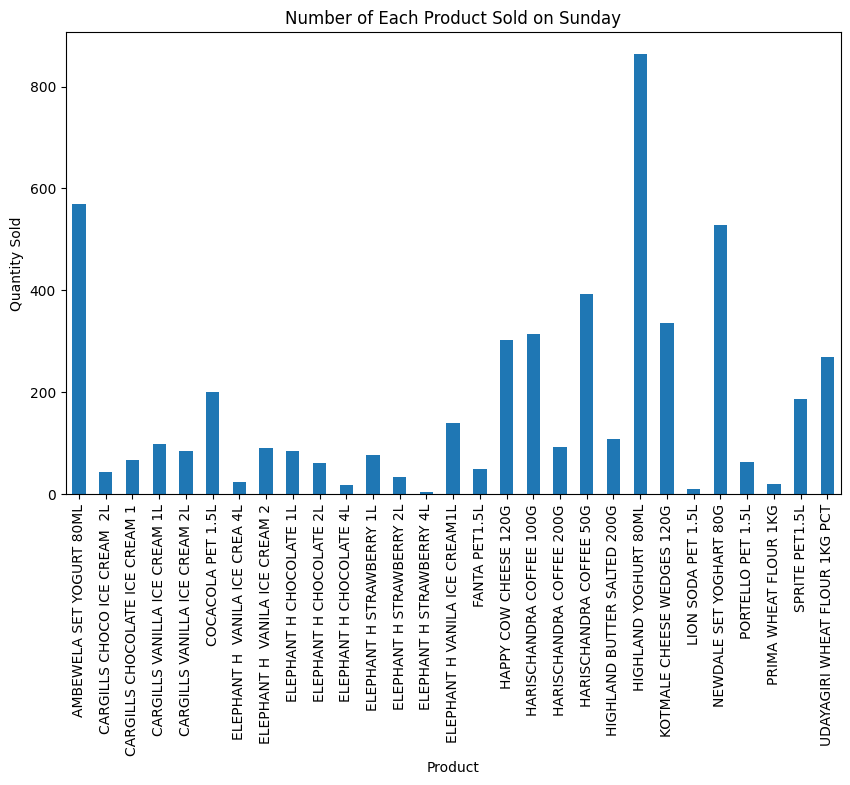

In [64]:
# Assuming 'Description' is the column with product descriptions
products_sold = df.groupby(['DayOfWeek', 'DESCRIPTION']).size()
monday_products = products_sold.loc['Monday']
import matplotlib.pyplot as plt

days_of_week = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in days_of_week:
    daily_products = products_sold.loc[day]

    plt.figure(figsize=(10, 6))
    daily_products.plot(kind='bar')
    plt.title(f'Number of Each Product Sold on {day}')
    plt.xlabel('Product')
    plt.ylabel('Quantity Sold')
    plt.show()
